In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
from tensorflow.keras.models import Model

In [7]:
from tensorflow.keras.layers import Input,Flatten,Dense

In [8]:
result=["T_shirt","Trouser","pullover","Dress","coat","sandal","shirt","sneaker","Bag","Ankle Boot"]

In [9]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
X_train.max()

255

In [14]:
X_train.min()

0

In [15]:
X_train_scale=X_train/255.0

In [16]:
X_test_scale=X_test/255.0

In [17]:
X_train_scale.max()

1.0

In [18]:
X_test_scale.max()

1.0

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train_scale.shape

(60000, 28, 28)

In [21]:
feed=Input(shape=(28,28))

In [22]:
feed

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [23]:
flat=Flatten()(feed)

In [24]:
flat

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>

In [25]:
den1=Dense(units=256,activation="relu")(flat)

In [26]:
den1

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>

In [27]:
den2=Dense(units=128,activation="relu")(den1)

In [28]:
den2

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_1')>

In [29]:
den3=Dense(units=64,activation="relu")(den2)

In [30]:
den3

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_2')>

In [31]:
out=Dense(units=10,activation="softmax")(den3)

In [32]:
fun_model=Model(inputs=feed,outputs=out)

In [33]:
fun_model

In [34]:
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (94

In [35]:
fun_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

In [36]:
fun_model.fit(X_train_scale,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4812 - accuracy: 0.8277
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3640 - accuracy: 0.8659
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3306 - accuracy: 0.8755
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3066 - accuracy: 0.8861
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2892 - accuracy: 0.8918
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.8958
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9028
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2496 - accuracy: 0.9053
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2417 - accuracy: 0.9093
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.232

In [37]:
fun_model.evaluate(X_test_scale,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8863


[0.3987240195274353, 0.8863000273704529]

In [38]:
result

['T_shirt',
 'Trouser',
 'pullover',
 'Dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'Bag',
 'Ankle Boot']

# predication

In [39]:
X_train_scale[32343]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09019608, 0.51372549, 0.57647059,
        0.52941176, 0.2627451 , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.55294118, 0.90196078, 0.94901961, 0.94901961,
        0.95294118, 0.94901961, 0.91764706, 0.01568627, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.01568627,
        0.7372549 , 0.92941176, 0.87058824, 0.84313725, 0.83921569,
        0.82352941, 0.8313

In [40]:
X_train_scale.shape

(60000, 28, 28)

In [41]:
X_train_scale[32343].shape

(28, 28)

In [42]:
img=X_train_scale[32343].reshape((1,)+X_train_scale[32343].shape)

In [43]:
img

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.09019608, 0.51372549, 0.57647059,
         0.52941176, 0.2627451 , 0.        , 0.        , 0.00784314,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.55294118, 0.90196078, 0.94901961, 0.94901961,
         0.95294118, 0.94901961, 0.91764706, 0.01568627, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.01176471, 0.        , 0.01568627,
         0.7372549 , 0.92941176, 0.87058824, 0.84313725, 0.83921569,
         0.

In [44]:
img.shape

(1, 28, 28)

In [45]:
fun_model.predict(img)

1/1 [==============================] - 0s 71ms/step


array([[1.3794865e-05, 4.0471893e-10, 1.7695263e-02, 9.3574945e-06,
        9.8163730e-01, 4.7383424e-11, 6.4416154e-04, 4.2727741e-11,
        1.4495741e-07, 1.3571209e-10]], dtype=float32)

In [46]:
np.argmax(fun_model.predict(img))

1/1 [==============================] - 0s 8ms/step


4

In [47]:
result[4]

'coat'

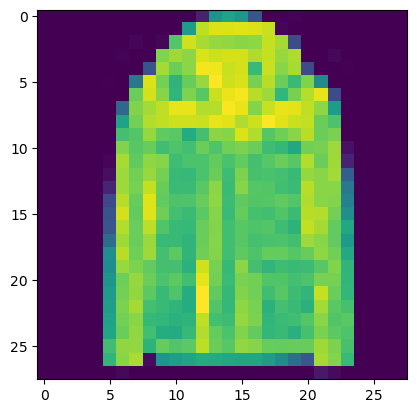

In [48]:
plt.imshow(X_train_scale[32343])

In [49]:
y_train[32343]

4

In [50]:
result[4]

'coat'

# second predication

In [52]:
X_test_scale[2122]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
X_test_scale.shape

(10000, 28, 28)

In [57]:
X_test_scale[2122]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [58]:
img1=X_test_scale[2122].reshape((1,)+X_test_scale[2122].shape)

In [59]:
img1

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [60]:
img1.shape

(1, 28, 28)

In [61]:
fun_model.predict(img1)

1/1 [==============================] - 0s 20ms/step


array([[9.7594284e-20, 7.7811186e-31, 8.9899018e-23, 3.6170969e-29,
        8.8945460e-26, 6.3494254e-14, 2.4129136e-18, 1.0000000e+00,
        1.3714274e-17, 3.9327357e-11]], dtype=float32)

In [62]:
np.argmax(fun_model.predict(img1))

1/1 [==============================] - 0s 28ms/step


7

In [67]:
y_test[2122]

7

In [68]:
result[7]

'sneaker'

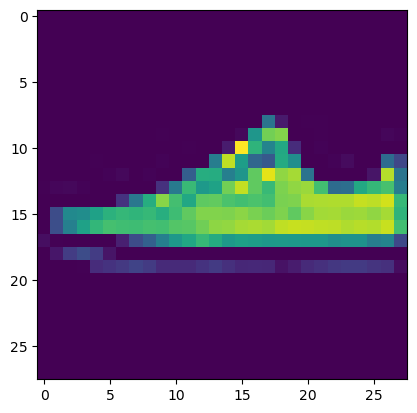

In [64]:
plt.imshow(X_test_scale[2122])